In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/COPD.csv')

In [3]:
df.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,COPD_prevalence
0,1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,8.1
1,1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,7.6
2,1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,8.3
3,1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,7.2
4,1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,5.9


In [4]:
df.set_index('CensusTract', inplace=True)
df.head()


,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,COPD_prevalence
CensusTract,,,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,8.1
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,7.6
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,8.3
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,7.2
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,5.9


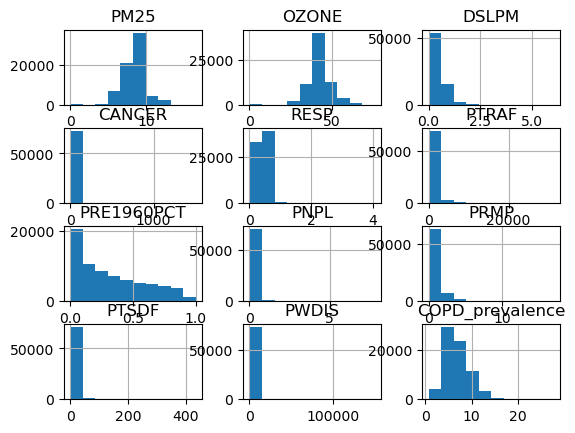

In [5]:
df.hist()
plt.show()

In [6]:
X = df.copy()
X.drop('COPD_prevalence', axis=1, inplace=True)
y = df['COPD_prevalence']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54242, 11) (54242,)
(18081, 11) (18081,)


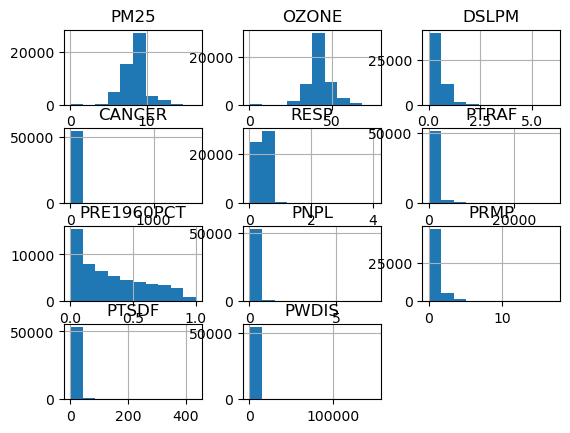

In [9]:
X_train.hist()
plt.show()

In [10]:
X_train.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
36005028300,8.207399,41.259739,1.555283,41.949118,0.676922,12123.662924,0.683718,0.090400,0.854318,38.373136,2.756333e-03
48199030502,9.144655,34.335341,0.343069,43.134223,0.576596,404.739135,0.080421,0.024975,0.693101,0.063615,1.369444e-04
6037502802,13.101030,48.633248,0.724939,42.503083,0.615856,2252.337598,0.089032,0.448494,5.611384,25.207062,4.017840e+00
27111960500,5.792458,37.417531,0.089389,15.512694,0.188858,5.973026,0.237135,0.793861,1.403404,0.894152,7.961844e-10
12023110300,7.853292,32.783956,0.139550,36.392127,0.541289,49.769950,0.205468,0.016073,0.759205,0.236432,5.925397e-10


In [11]:
# Saving data without normalization

X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_COPD')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_COPD')
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_COPD')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_COPD')

In [12]:
# Taking the log of the data in X_train that are not close to being normally distributed

X_train_log = X_train.copy()

pt = PowerTransformer()
pt.fit(X_train_log[['DSLPM']])
X_train_log['DSLPM'] = pt.transform(X_train_log[['DSLPM']])

pt1 = PowerTransformer()
pt1.fit(X_train_log[['CANCER']])
X_train_log['CANCER'] = pt1.transform(X_train_log[['CANCER']])

pt2 = PowerTransformer()
pt2.fit(X_train_log[['RESP']])
X_train_log['RESP'] = pt2.transform(X_train_log[['RESP']]) 

pt3 = PowerTransformer()
pt3.fit(X_train_log[['PTRAF']])
X_train_log['PTRAF'] = pt3.transform(X_train_log[['PTRAF']])

pt4 = PowerTransformer()
pt4.fit(X_train_log[['PRE1960PCT']])
X_train_log['PRE1960PCT'] = pt4.transform(X_train_log[['PRE1960PCT']])

pt5 = PowerTransformer()
pt5.fit(X_train_log[['PNPL']])
X_train_log['PNPL'] = pt5.transform(X_train_log[['PNPL']])

pt6 = PowerTransformer()
pt6.fit(X_train_log[['PRMP']])
X_train_log['PRMP'] = pt6.transform(X_train_log[['PRMP']])

pt7 = PowerTransformer()
pt7.fit(X_train_log[['PTSDF']])
X_train_log['PTSDF'] = pt7.transform(X_train_log[['PTSDF']])

pt8 = PowerTransformer()
pt8.fit(X_train[['PWDIS']])
X_train['PWDIS'] = pt8.transform(X_train[['PWDIS']])

y_train_log = y_train.copy()
pt9 = PowerTransformer()
y_train_log = np.array(y_train_log)
y_train_log = y_train_log.reshape(-1,1)
pt9.fit(y_train_log)
y_train_log = pt9.transform(y_train_log)
y_train_log = np.ravel(y_train_log)

In [13]:
print(X_train_log.shape, y_train_log.shape)

(54242, 11) (54242,)


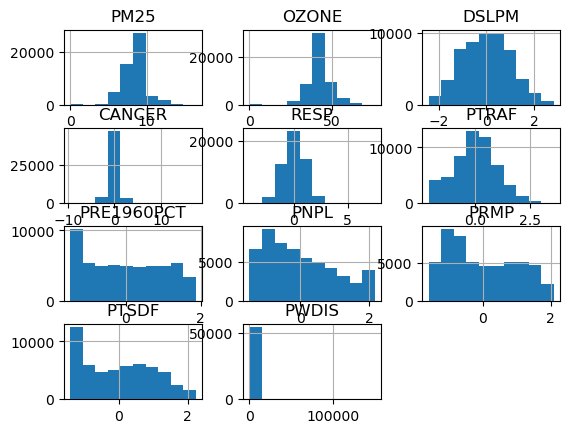

In [14]:
X_train_log.hist()
plt.show()

PWDIS should just be left out of the data since it is not normally distributed

In [15]:
X_test_log = X_test.copy()

In [16]:
X_train_log.drop('PWDIS', axis=1, inplace=True)
X_test_log.drop('PWDIS', axis=1, inplace=True)

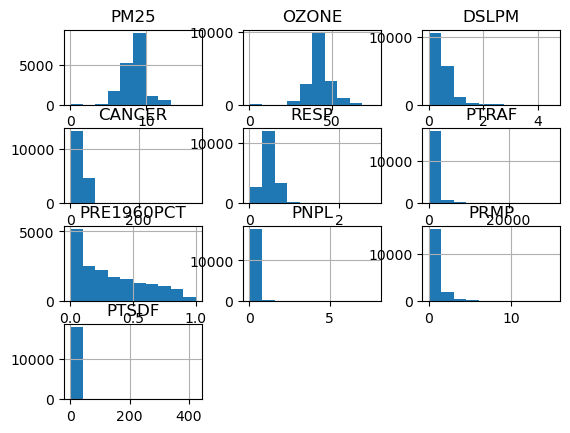

In [17]:
X_test_log.hist()
plt.show()

In [18]:
# Transforming the test data using the PowerTransformer that I fit on the train data
X_test_log['DSLPM'] = pt.transform(X_test_log[['DSLPM']])

X_test_log['CANCER'] = pt1.transform(X_test_log[['CANCER']])

X_test_log['RESP'] = pt2.transform(X_test_log[['RESP']]) 

X_test_log['PTRAF'] = pt3.transform(X_test_log[['PTRAF']])

X_test_log['PRE1960PCT'] = pt4.transform(X_test_log[['PRE1960PCT']])

X_test_log['PNPL'] = pt5.transform(X_test_log[['PNPL']])

X_test_log['PRMP'] = pt6.transform(X_test_log[['PRMP']])

X_test_log['PTSDF'] = pt7.transform(X_test_log[['PTSDF']])


y_test_log = y_test.copy()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.reshape(-1,1)
y_test_log = pt9.transform(y_test_log)
y_test_log = y_test_log.reshape(18081,)
y_test_log.shape

(18081,)

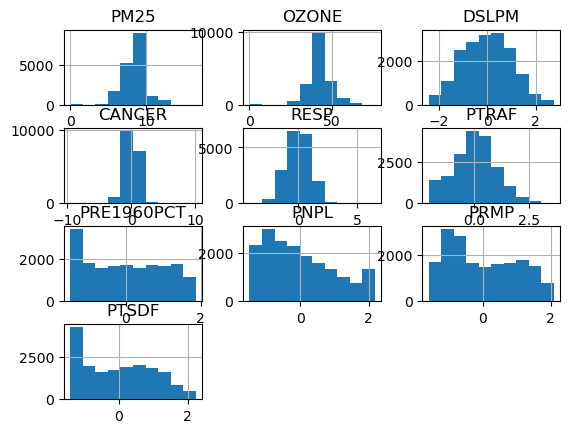

In [19]:
X_test_log.hist()
plt.show()

COPD data should now be ready to model

In [20]:
print(y_train_log.shape, X_train_log.shape, y_test_log.shape, X_test_log.shape)

(54242,) (54242, 10) (18081,) (18081, 10)


In [21]:
X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_COPD')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_COPD')

y_test = pd.Series(y_test)
y_train = pd.Series(y_train)
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_COPD')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_COPD')